# **종합실습2 이변량분석(y-범주) : 직원 이직 분석**

![](https://www.talentalign.com/wp-content/uploads/2019/09/main-qimg-2434943004743f79c0abf540cb4f6e2c-cropped.jpg)

* 직원 이직 분석
    * 회사에서 최근 1~2년 사이 이직률이 상승하였습니다.
    * 여러분은, 직원들이 이직하는데 중요한 요인이 무엇인지 데이터를 기반으로 한 분석을 의뢰 받았습니다.

## **1.환경준비**

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.

In [2]:
# 직원 이직 데이터
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple3.csv'
data = pd.read_csv(path)
data.head(5)

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,27,2,1898,Female,3,Single,6500,No,14,9
1,0,27,9,1965,Male,4,Single,4105,No,14,7
2,0,44,2,1703,Female,4,Married,7879,Yes,19,9
3,0,42,2,1231,Male,1,Married,6272,No,16,10
4,0,32,1,2016,Female,4,Married,10422,No,19,14


> * 변수설명
    * **Attrition**	:	이직여부, Yes , No (**Target**)
    * **Age**	:	나이
    * **DistanceFromHome**	:	집-직장 거리(마일)
    * **EmployeeNumber**	:	사번
    * **Gender**	:	성별(Male, Female)
    * **JobSatisfaction**	:	직무 만족도, 다음시트 참조
    * **MaritalStatus**	:	결혼상태(Married, Single, Divorced)
    * **MonthlyIncome**	:	월급(달러)
    * **OverTime**	:	야근여부
    * **PercentSalaryHike**	:	전년대비 급여인상율(%)
    * **TotalWorkingYears**	:	총 근무 연수



## **2.범주-->범주**

In [5]:
target = 'Attrition'

### **(1) Gender --> Attrition**

In [ ]:
feature = 'Gender'

* 교차표

In [ ]:
# 두 범주별 빈도수를 교차표로 만들어 봅시다.
pd.crosstab(data[target], data[feature])

In [ ]:
pd.crosstab(data[target], data[feature], normalize = 'columns')

* 시각화

In [ ]:
mosaic(data, [ feature,target])
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

* 수치화 : 카이제곱검정

In [ ]:
# 먼저 집계
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('자유도', result[2])
print('기대빈도\n',result[3])

* 파악된 내용을 기술해 봅시다.

In [ ]:
# 카이제곱검정으로는 관련이 없다고 나오나, 그래프로 볼때 약간 관련이 있다고 판단됨.

### **(2) JobSatisfaction --> Attrition**

In [3]:
feature = 'JobSatisfaction'

* 교차표

In [6]:
pd.crosstab(data[target], data[feature])

JobSatisfaction,1,2,3,4
Attrition,,,,
0,74,79,114,138
1,52,37,59,47


In [7]:
pd.crosstab(data[target], data[feature], normalize='columns')

JobSatisfaction,1,2,3,4
Attrition,,,,
0,0.587302,0.681034,0.65896,0.745946
1,0.412698,0.318966,0.34104,0.254054


* 시각화

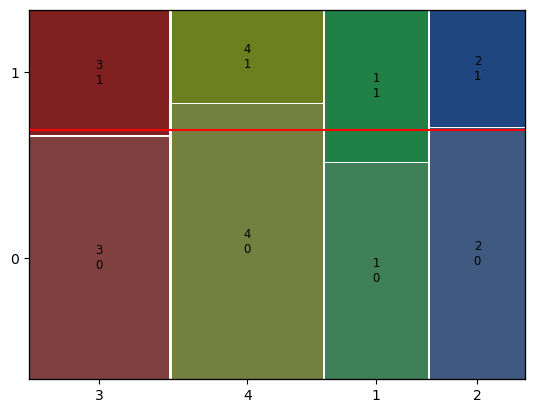

In [11]:
mosaic(data, [feature, target])
plt.axhline(1-data[target].mean(), color='r')
plt.show()

* 수치화 : 카이제곱검정

In [12]:
table = pd.crosstab(data[target], data[feature])
print(table)

result = spst.chi2_contingency(table)
print('카이제곱통계량 : ', result[0])
print('p-value : ', result[1])
print('자유도 : ', result[2])
print('기대빈도 : ', result[3])

JobSatisfaction   1   2    3    4
Attrition                        
0                74  79  114  138
1                52  37   59   47
카이제곱통계량 :  8.884191097554549
p-value :  0.03087092125625072
자유도 :  3
기대빈도 :  [[ 85.05   78.3   116.775 124.875]
 [ 40.95   37.7    56.225  60.125]]


* 파악된 내용을 기술해 봅시다.

In [ ]:
모자익그래프로 확인해봤을때 별로 차이가 없어서 큰 영향은 없다고 볼 수 있다. 
그리고 카이제곱통계로 확인 했을때는 카이제곱통계량이 자유도의 2배보다 살짝 큰 값이고 p-value도 0.05랑 거의 차이가 없어서 직업만족도는 이직여부에 큰 영향은 없어보인다.

### **(3) MaritalStatus --> Attrition**

In [13]:
# 결혼여부
feature = 'MaritalStatus'

* 교차표

In [14]:
pd.crosstab(data[target], data[feature])

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,89,205,111
1,23,69,103


In [15]:
pd.crosstab(data[target], data[feature], normalize='columns')

MaritalStatus,Divorced,Married,Single
Attrition,,,
0,0.794643,0.748175,0.518692
1,0.205357,0.251825,0.481308


* 시각화

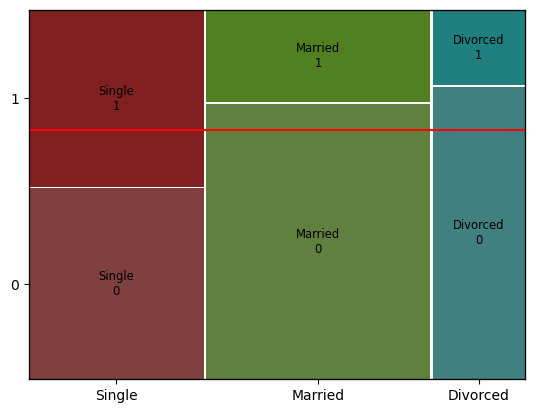

In [16]:
mosaic(data, [feature, target])
plt.axhline(1-data[target].mean(), color='r')
plt.show()

* 수치화 : 카이제곱검정

In [17]:
table = pd.crosstab(data[target], data[feature])
print(table)

result = spst.chi2_contingency(table)
print('카이제곱통계량 : ', result[0] )
print('p-value : ', result[1])
print('자유도 : ', result[2])
print('기대빈도 : ', result[3])

MaritalStatus  Divorced  Married  Single
Attrition                               
0                    89      205     111
1                    23       69     103
카이제곱통계량 :  37.829711907070525
p-value :  6.100738829354226e-09
자유도 :  2
기대빈도 :  [[ 75.6  184.95 144.45]
 [ 36.4   89.05  69.55]]


* 파악된 내용을 기술해 봅시다.

In [ ]:
모자익그래프로 확인했을때 각 single일때 전체평균이랑 차이가 꽤 나고 나머지도 어느정도 차이가 있다
카이제곱검정을 했을 떄 카이제곱 통계량이 자유도의 2배보다 많이 크고 p-value값도 0에 가깝기때문에 결혼여부는 이직여부에 영향을 미친다고 볼 수 있따.

### **(4) OverTime --> Attrition**

* 교차표

* 시각화

* 수치화 : 카이제곱검정

* 파악된 내용을 기술해 봅시다.

## **3.숫자-->범주**

### **(1) Age --> Attrition**

In [ ]:
feature = 'Age'

In [ ]:
sns.kdeplot(x= feature, data = data, hue = target,
            common_norm = False)
plt.show()

In [ ]:
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

### **(2) DistanceFromHome --> Attrition**

In [28]:
feature = 'DistanceFromHome'

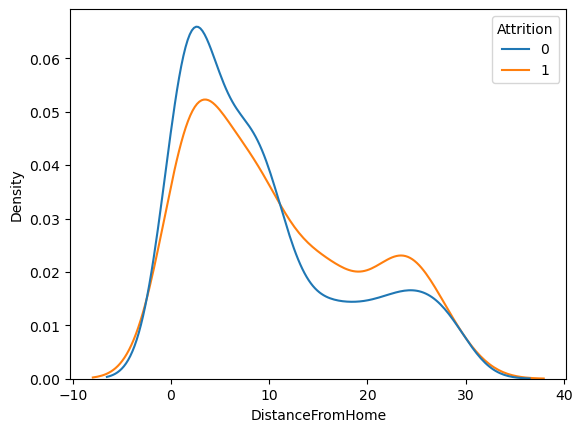

In [29]:
sns.kdeplot(x=feature, data=data, hue=target, common_norm=False)
plt.show()

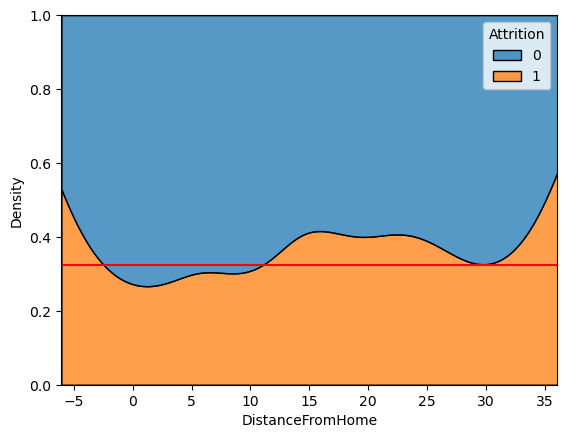

In [31]:
# sns.kdeplot(x=feature, data=data, hue=target, common_norm=False, multiple='fill')
# plt.axhline(data[target].mean(), color='r')
# plt.show()
sns.kdeplot(x= feature, data = data, hue = target
            , multiple = 'fill')
plt.axhline(data[target].mean(), color = 'r')
plt.show()

* 파악된 내용을 기술해 봅시다.

### **(3) MonthlyIncome --> Attrition**

In [24]:
feature = 'MonthlyIncome'

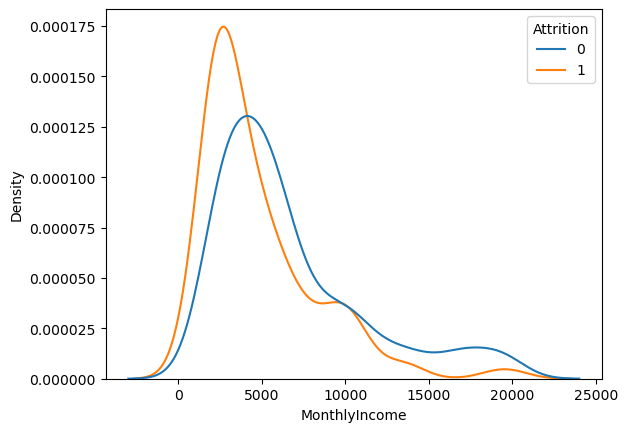

In [25]:
sns.kdeplot(x=feature, data=data, hue=target, common_norm=False)
plt.show()

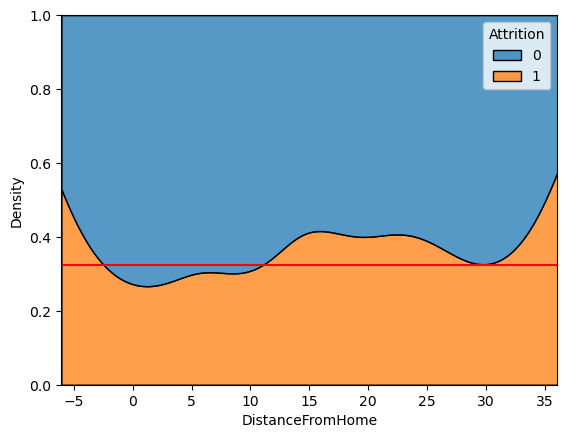

In [34]:
sns.kdeplot(x=feature, data=data, hue=target, multiple='fill') # common_norm=False
plt.axhline(data[target].mean(), color='r')
plt.show()

* 파악된 내용을 기술해 봅시다.

### **(4) PercentSalaryHike --> Attrition**

* 파악된 내용을 기술해 봅시다.

### **(5) TotalWorkingYears --> Attrition**

* 파악된 내용을 기술해 봅시다.

## **4.관계 정리하기**

① 강한관계

② 중간관계

③ 관계없음(약한 관계)

In [35]:
data=pd.read_csv('https://bit.ly/3PArw4W')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [36]:
result = spst.pearsonr(data['tax'], data['medv'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.4685359335677671, p-value : 5.637733627690444e-29
